In [1]:
import sys, os
import pandas as pd
import numpy as np
from statsmodels.tsa.base import tsa_model as tsa
from statsmodels.tsa import holtwinters as hw

from nyoka import ExponentialSmoothingToPMML 
import matplotlib.pyplot as plt

In [2]:
def import_data(trend=False, seasonality=False):
    """
    Returns a dataframe with time series values.
    :param trend: boolean
        If True, returns data with trend
    :param seasonality: boolean
        If True, returns data with seasonality
    :return: ts_data: DataFrame
        Index of the data frame is either a time-index or an integer index. First column has time series values
    """
    if trend and seasonality:
        # no of international visitors in Australia
        data = [41.7275, 24.0418, 32.3281, 37.3287, 46.2132, 29.3463, 36.4829, 42.9777, 48.9015, 31.1802, 37.7179,
                40.4202, 51.2069, 31.8872, 40.9783, 43.7725, 55.5586, 33.8509, 42.0764, 45.6423, 59.7668, 35.1919,
                44.3197, 47.9137]
        index = pd.date_range(start='2005', end='2010-Q4', freq='QS')
        ts_data = pd.Series(data, index)
        ts_data.index.name = 'datetime_index'
        ts_data.name = 'n_visitors'
        return ts_data
    elif trend:
        # no. of annual passengers of air carriers registered in Australia
        data = [17.5534, 21.86, 23.8866, 26.9293, 26.8885, 28.8314, 30.0751, 30.9535, 30.1857, 31.5797, 32.5776,
                33.4774, 39.0216, 41.3864, 41.5966]
        index = pd.date_range(start='1990', end='2005', freq='A')
        ts_data = pd.Series(data, index)
        ts_data.index.name = 'datetime_index'
        ts_data.name = 'n_passengers'
        return ts_data
    elif seasonality:
        pass
    else:
        # Oil production in Saudi Arabia
        data = [446.6565, 454.4733, 455.663, 423.6322, 456.2713, 440.5881, 425.3325, 485.1494, 506.0482, 526.792,
                514.2689, 494.211]
        index = pd.date_range(start='1996', end='2008', freq='A')
        ts_data = pd.Series(data, index)
        ts_data.index.name = 'datetime_index'
        ts_data.name = 'oil_production'
        return ts_data

# Simple Exponential Smoothing
# No Trend No Seasonality

In [3]:
ts_data = import_data(trend=False, seasonality=False)

Yearly oil prodcution in Saudi Arabia

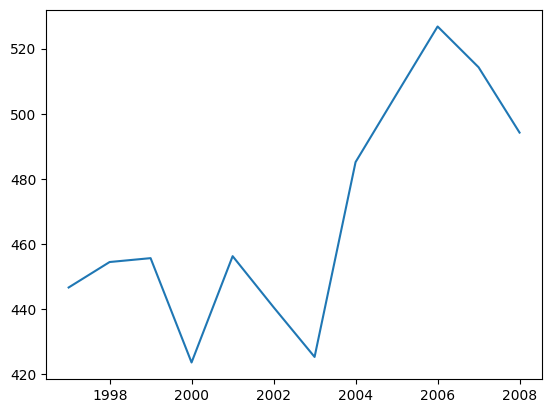

In [4]:
plt.plot(ts_data)

Create a model object using statsmodels, for simple exponential smoothing.

In [5]:
# trend: {add, mul, None}
# seasonal: {add, mul, None}
# damped_trend: {True, False}
# seasonal_periods: {int, None}
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend=None, 
                                    damped_trend=False, 
                                    seasonal=None, 
                                    seasonal_periods=None)
results_obj = model_obj.fit(optimized=True)

In [6]:
results_obj.model.trend

In [7]:
results_obj.model.endog

array([446.6565, 454.4733, 455.663 , 423.6322, 456.2713, 440.5881,
       425.3325, 485.1494, 506.0482, 526.792 , 514.2689, 494.211 ])

In [8]:
results_obj.data.orig_endog

datetime_index
1996-12-31    446.6565
1997-12-31    454.4733
1998-12-31    455.6630
1999-12-31    423.6322
2000-12-31    456.2713
2001-12-31    440.5881
2002-12-31    425.3325
2003-12-31    485.1494
2004-12-31    506.0482
2005-12-31    526.7920
2006-12-31    514.2689
2007-12-31    494.2110
Freq: A-DEC, Name: oil_production, dtype: float64

Create a pmml file from the model object using Nyoka and the exporter

In [9]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(results_obj, pmml_file_name);

# Holt's Exponential Smoothing (only trend, no seasonality)

In [10]:
ts_data = import_data(trend=True, seasonality=False)

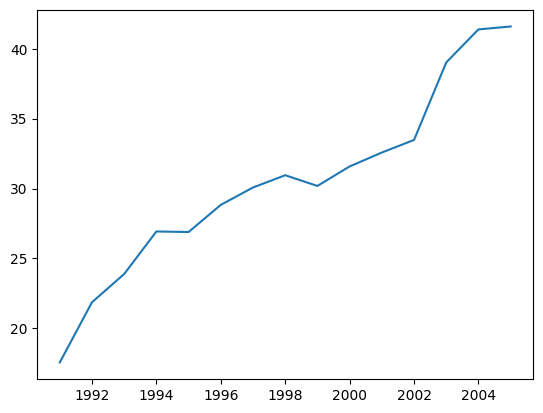

In [11]:
plt.plot(ts_data)

** Additive trend. No damping **

In [12]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped_trend=False, 
                                    seasonal=None, 
                                    seasonal_periods=None)
results_obj = model_obj.fit(optimized=True)

initial_level, inital_slope, smoothing_level and smoothing_slope are the relavant parameters

In [13]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(results_obj, pmml_file_name);

** Addditve trend with damping**

In [14]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped_trend=True, 
                                    seasonal=None, 
                                    seasonal_periods=None)
results_obj = model_obj.fit(optimized=True)

In [15]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(results_obj, pmml_file_name);

** Multiplicative trend. No damping**

In [16]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='mul', 
                                    damped_trend=False, 
                                    seasonal=None, 
                                    seasonal_periods=None)
results_obj = model_obj.fit(optimized=True)

In [17]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(results_obj, pmml_file_name);

** Multiplicative trend with damping **

In [18]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='mul', 
                                    damped_trend=True, 
                                    seasonal=None, 
                                    seasonal_periods=None)
results_obj = model_obj.fit(optimized=True)

In [19]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(results_obj, pmml_file_name);

# Holt - Winter Exponential Smoothing (trend and seasonality present)

** Additive trend, additive seasonality, no damping **

In [20]:
ts_data = import_data(trend=True, seasonality=True)

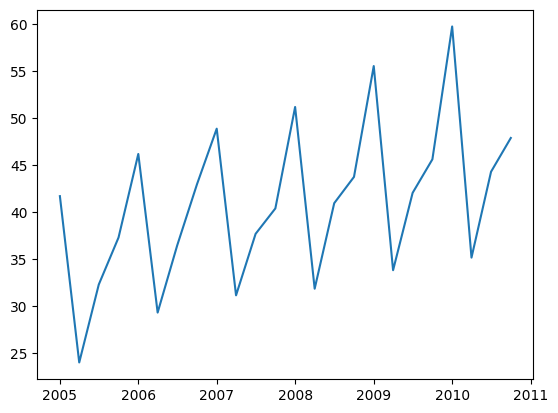

In [21]:
plt.plot(ts_data)

In [22]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped_trend=False, 
                                    seasonal='add', 
                                    seasonal_periods=4)
results_obj = model_obj.fit(optimized=True)

In [23]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(results_obj, pmml_file_name);

** Additive trend, additive seasonality, with damping **

In [24]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped_trend=True, 
                                    seasonal='add', 
                                    seasonal_periods=4)
results_obj = model_obj.fit(optimized=True)

In [25]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(results_obj, pmml_file_name);

** Additive trend, multiplicative seasonality, no damping **

In [26]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped_trend=False, 
                                    seasonal='mul', 
                                    seasonal_periods=4)
results_obj = model_obj.fit(optimized=True)

In [27]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML( results_obj, pmml_file_name);

** Additive trend, multiplicative seasonality with damping **

In [28]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped_trend=False, 
                                    seasonal='mul', 
                                    seasonal_periods=4)
results_obj = model_obj.fit(optimized=True)

In [30]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(results_obj, pmml_file_name);